# Part I - Ford GoBike System Data
## By Tuğba Telli

## This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area and I will provide seven exploratory data visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set. I will try to write fluent code and meaningful descriptions while I'm doing it. 

## Preliminary Wrangling

In [7]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

> Here is my dataset's first few rows. 


In [8]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


### What is the structure of your dataset?

> When we check with .info() function we see that total entries are 183412 and total columns are 16. 

>* Here is a detailed description of each column:

> 1. duration_sec: Duration of the trip in seconds (int64)
> 2. start_time: Start time of the trip (object)
> 3. end_time: End time of the trip (object)
> 4. start_station_id: ID of the start station (float64)
> 5. start_station_name: Name of the start station (object)
> 6. start_station_latitude: Latitude of the start station (float64)
> 7. start_station_longitude: Longitude of the start station (float64)
> 8. end_station_id: ID of the end station (float64)
> 9. end_station_name: Name of the end station (object)
> 10. end_station_latitude: Latitude of the end station (float64)
> 11. end_station_longitude: Longitude of the end station (float64)
> 12. bike_id: ID of the bike used (int64)
> 13. user_type: Type of user (Customer or Subscriber) (object)
> 14. member_birth_year: Birth year of the member (float64)
> 15. member_gender: Gender of the member (Male, Female, or Other) (object)
> 16. bike_share_for_all_trip: Whether the bike was shared for the entire trip (Yes or No) (object)

### What is/are the main feature(s) of interest in your dataset?

> Maybe I can check the gender or birth year to compare gender vs duration sec or age vs duration sec but in these columns there are too many null values. So I should move with clean null values from the data. Duration sec's data type should be time and birth year also should be fixed. I can also look for start station and end station names to find out which is the most popoular city to start and end the tour. Also I can look for bike sharing type to find out whether trips are mostly shared or not. And finally I can check the user type to understand whether customer or member uses it more often.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> duration_sec, member_birth_year, member_gender, Start_staition_name, end_station_name, start_station_id, end_station_id, start_time and end_time columns would be helpful to find out my interest's answers.

## Univariate Exploration

> In this section, I made 3 graphs. First one is a Histopgram about age distribution. I used for reach the ages, member_birth_year column in the dataset. I created a df_cleaned dataset to add age column in here. And to reach ages, I applied the current year as 2024 (this year). I also cleaned the na values in dataset.

> And second graph is a Bar Chart to see the user type proportion. And third graph is a Bar Plot again to see the member gender distribution. In total for this section I used member_birth_year, age, user_type, member_gender columns from these datasets.


/tmp/ipykernel_31/1891950459.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['age'] = current_year - df_cleaned['member_birth_year'].astype(int)


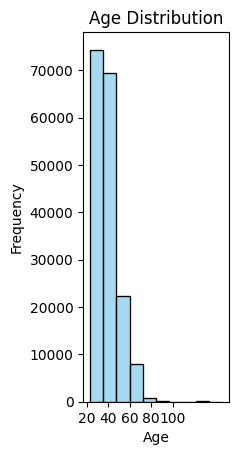

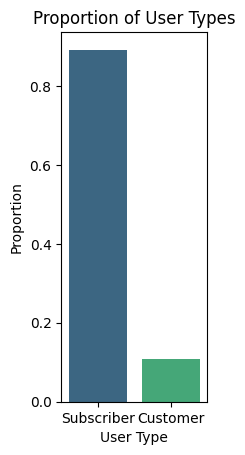

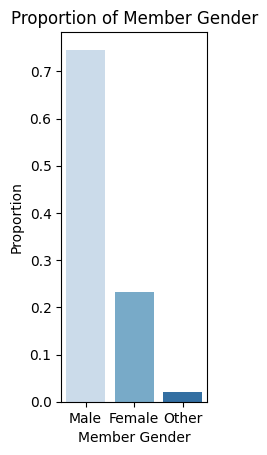

In [9]:
# Clean the dataset: drop na values
df_cleaned = df.dropna(subset=['member_birth_year', 'duration_sec'])

# turn the member_birth_year's column dtype to int and make a new "age" column to get a meaningful data.
current_year = 2024
df_cleaned['age'] = current_year - df_cleaned['member_birth_year'].astype(int)

# Draw the histogram plot
plt.subplot(1, 3, 1)
sns.histplot(df_cleaned['age'], bins=10, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(np.arange(20, 101, 20))
plt.show()

# Calculate the user_type proportions 
user_type_counts = df['user_type'].value_counts(normalize=True)
member_gender_counts = df['member_gender'].value_counts(normalize=True)

# Create a barchart to see the proportion of User Types
plt.subplot(1, 3, 2)
sns.barplot(x=user_type_counts.index, y=user_type_counts.values, palette='viridis')
plt.xlabel('User Type')
plt.ylabel('Proportion')
plt.title('Proportion of User Types')
plt.show()

# Create a barchart to see the proportion of Member Genders.
plt.subplot(1, 3, 3)
sns.barplot(x=member_gender_counts.index, y=member_gender_counts.values, palette='Blues')
plt.xlabel('Member Gender')
plt.ylabel('Proportion')
plt.title('Proportion of Member Gender')
plt.show()

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I look for age distribution in the histogram plot. To examine age, I subtracted the data in the birth year column from the current year (2024). The result shows that most of the cyclists are between 20-35 years old, while the group around 40 years old has the second highest frequency of cycling. 

> In the bar graph, I looked at the distribution of user types, with members accounting for more than 80% of all users and customers around 10%. I would not have expected members to have such a high proportion in the bar graph. 

> I removed the empty cells in the data and subtracted the data in the member_birth_year column based on the current year 2024 to create the age column. I did not make a data conversion other than that.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> It was suprising to see a high volume in subscribers for all the users when we look at bar chart. Customers rates would be more higher. I removed the empty cells in the data and subtracted the data in the member_birth_year column based on the current year 2024 to create the age column.

## Bivariate Exploration

> In this part, you will see one Scatter Plot about gender vs age comparison, one Box Plot about member gender vs age again and one Heat Map to compare User Type vs age.


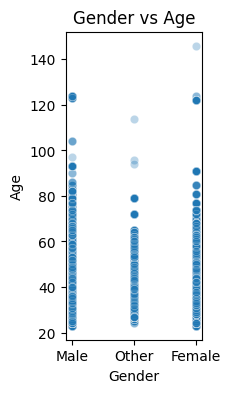

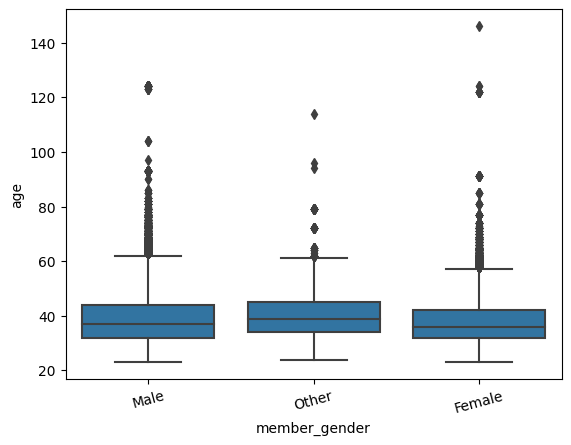

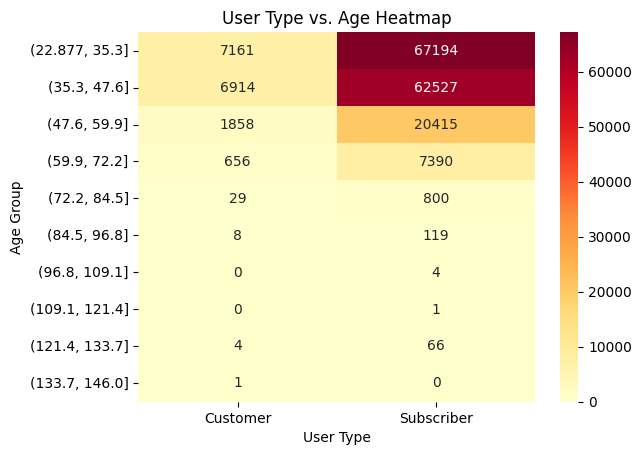

In [10]:
# First, I want to see the member_gender vs age. And I will use a scatterplot for this. 
plt.figure(figsize=(6, 4))
plt.subplot(1, 3, 1)
sns.scatterplot(data=df_cleaned, x='member_gender', y='age', alpha=0.3)
plt.title('Gender vs Age')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

# Second, I want see member gender vs age in a box chart. 
sns.boxplot(data=df_cleaned, x='member_gender', y='age', color='tab:blue')
plt.xticks(rotation = 15)
plt.show()

# Heat Map to see user type vs age
age_bins = pd.cut(df_cleaned['age'], bins=10)
heatmap_data = pd.crosstab(age_bins, df_cleaned['user_type'])
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt='d')
plt.title('User Type vs. Age Heatmap')
plt.xlabel('User Type')
plt.ylabel('Age Group')
plt.show()


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> There is no noticeable difference between the age distribution of customers and subscribers. Only after a certain age (80+) the frequency of customers is lower than the frequency of members. 

> When we look at member gender vs age box chart, women have a longer cycling age than men. The "other" group has the lowest scale in age distribution.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> When I look at the heatmap, there is one person in the customer group with an age between 137-146. 

## Multivariate Exploration

> In this section, you will see one Facet Plot to compare member gender (member_gender) vs age (age) and one Plot Matrix to compare age, duration seconds (duration_sec), user type (user_type) and member gender with each other. 


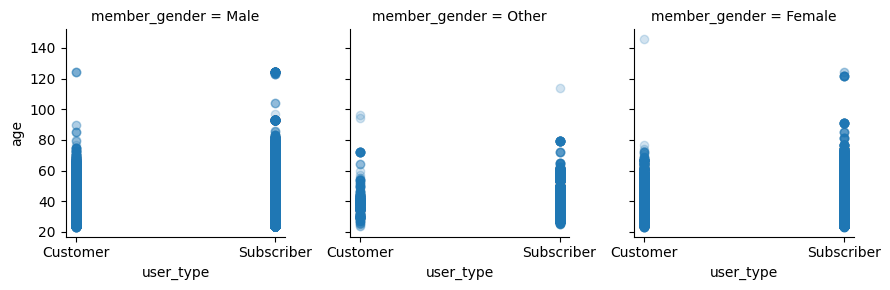

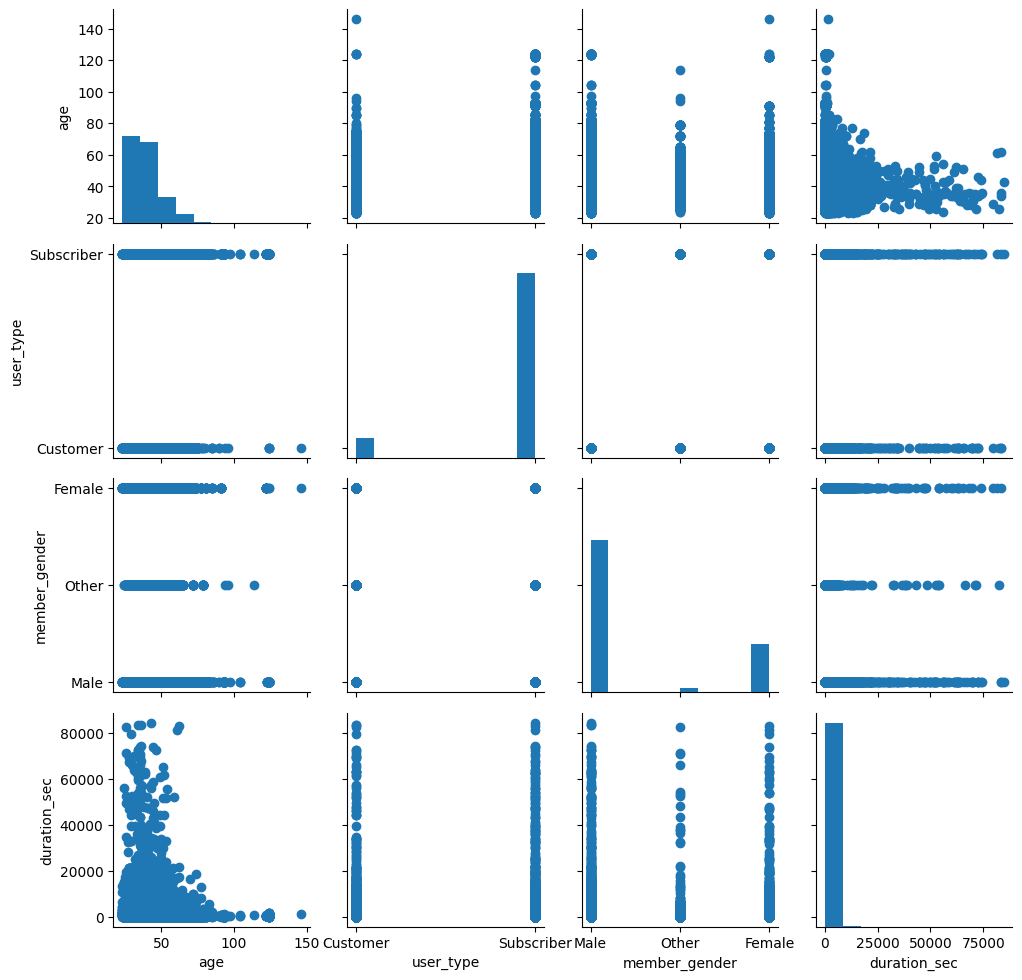

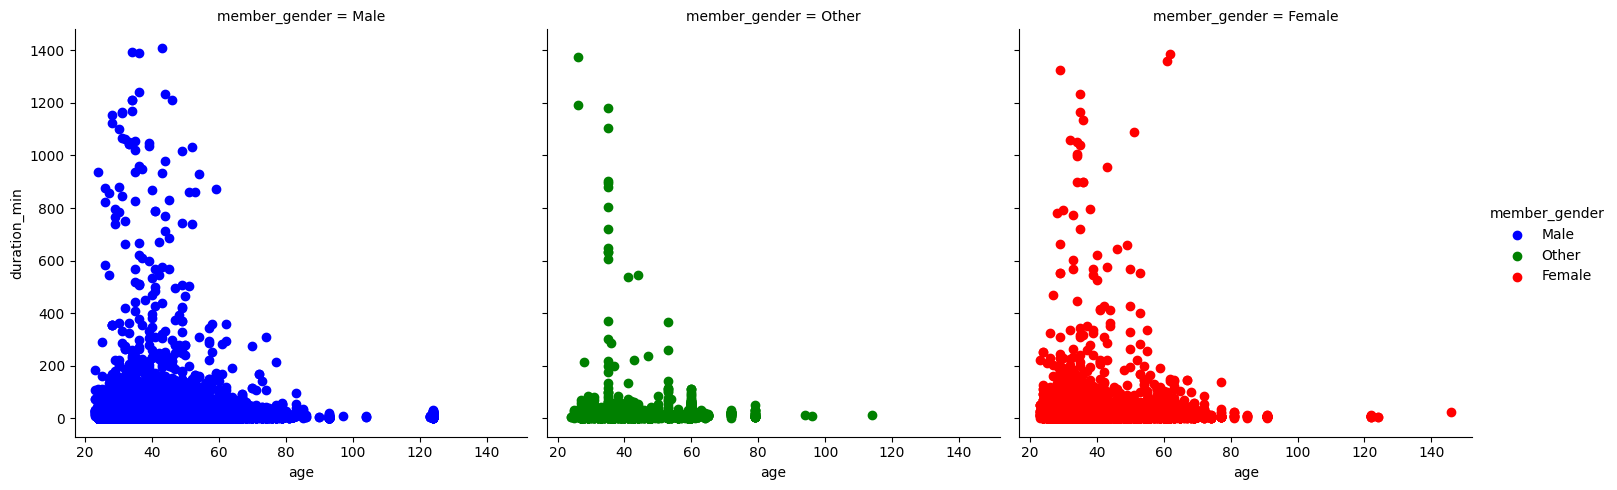

In [14]:
# Using a FacetGrid to plot the gender (member_gender) vs. age (age) for each user type (user_type)
g = sns.FacetGrid(data=df_cleaned, col='member_gender', height=3, col_wrap=3)
g.map(plt.scatter, 'user_type', 'age' , alpha=1/5)
plt.show()

# A Plot Matrix
stats = ['age', 'user_type', 'member_gender', 'duration_sec']
g = sns.PairGrid(data=df_cleaned, vars=stats);
g.map_offdiag(plt.scatter)
g.map_diag(plt.hist)
plt.show()

# I added age as an index again. Because if I don't add this code, I can not show the final comparison graph.
df['age'] = 2024 - df['member_birth_year']

# I prefer to calculate duration second as minutes so I use this code.
df['duration_min'] = df['duration_sec'] / 60

# In here, I assign a color palette.
palette = {'Male': 'blue', 'Female': 'red', 'Other': 'green'}

# Creating a plot matrix while using facetgrid with manuel color palette for a multivariate chart.
g = sns.FacetGrid(df, col='member_gender', hue='member_gender', palette=palette, height=5, aspect=1)
g.map(plt.scatter, 'age', 'duration_min').add_legend()

# Showing the graph
plt.show()


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The first graph is the facet plot. here I have evaluated gender for each user type. while there are very few users in the other category, the difference between customer and member users is larger in the female category than in the male category. 

> At the bottom you see the plot matrix. here younger users are both in the majority and duration sec is more. As age increases, duration sec decreases. 


### Were there any interesting or surprising interactions between features?

> The age range of women cycling is higher than men. This looks interesting.

## Conclusions

> 1. Looking at the dataset, most of the people who use bicycles are those who have a membership.
> 2. The majority of cyclists are between 20-40 years old.
> 3. Most of the users are male (+%70) the second most frequently user type is female (+%20).
> 4. Duration seconds decreases with increasing age.
> 5. When we look to heat map there is 1 person whose age between 137-146. This is strange.


> Save the modified DataFrame to a new CSV file



In [12]:
df_cleaned.to_csv('exploration_tugba', index=False)